## 5.5 Run a model of your choice

In [ ]:
# With the example above, you should be able to run any Hugging Face model that fits in a single GPU now.   Your task is to try one on your own. 

In [ ]:
#### Your Task ####
# Take a look at the LLM models in /share/LLMs/, you can find out their usage on hugging face hub
# Choose any one 
# Write the code to load it, using the GPU in your pod.
# Create at least three example use cases of the model, which should be different from what is given in the hugging face page.
# If you want to download your own model from HuggingFace, please do so on your laptop, 
# and then upload onto the cluster (instead of downloading it directly on the cluster as we have very limited Internet bandwidth.)


In [4]:
#### Your Task ####
# you may install any dependencies here using pip install, for example

# !pip install -qr https://huggingface.co/briaai/RMBG-1.4/resolve/main/requirements.txt

In [26]:
#### Your Task ####
#### Load the model ####
import requests
from PIL import Image
import torch

from transformers import Owlv2Processor, Owlv2ForObjectDetection

processor = Owlv2Processor.from_pretrained("/share/LLMs/owlv2-base-patch16-ensemble")
model = Owlv2ForObjectDetection.from_pretrained("/share/LLMs/owlv2-base-patch16-ensemble")

def run_Owlv2(img_path, texts):
    image = Image.open(img_path)
    image.show()
    inputs = processor(text=texts, images=image, return_tensors="pt")
    outputs = model(**inputs)

    # Target image sizes (height, width) to rescale box predictions [batch_size, 2]
    target_sizes = torch.Tensor([image.size[::-1]])
    # Convert outputs (bounding boxes and class logits) to COCO API
    results = processor.post_process_object_detection(outputs=outputs, threshold=0.1, target_sizes=target_sizes)

    i = 0  # Retrieve predictions for the first image for the corresponding text queries
    text = texts[i]
    boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    # Print detected objects and rescaled box coordinates
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")



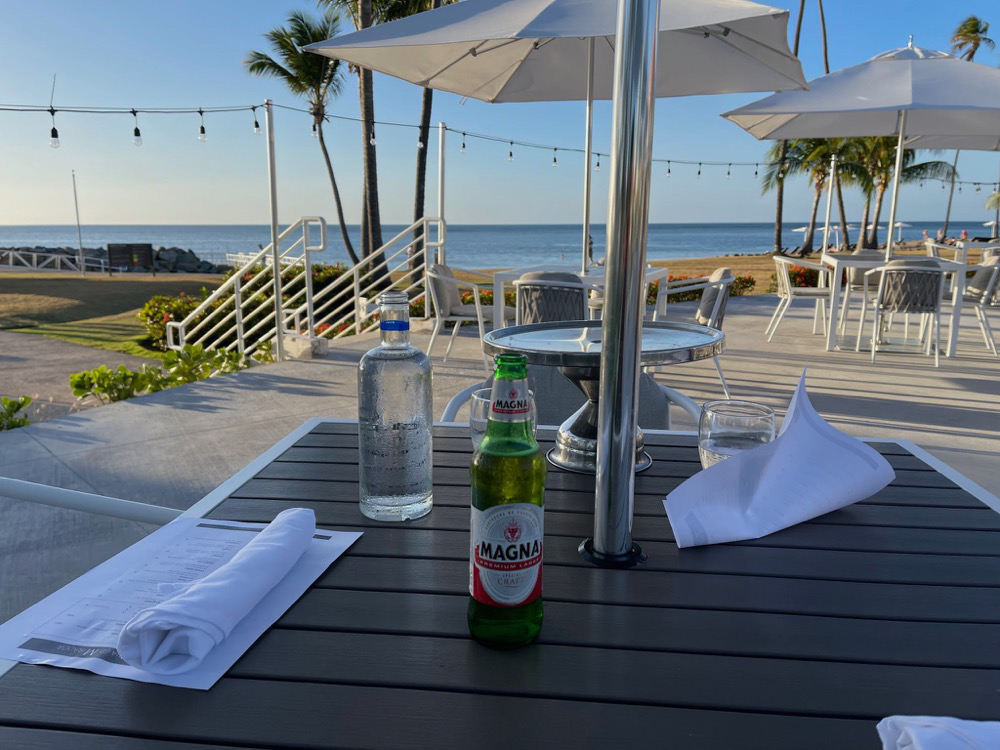

Detected a photo of a bottle with confidence 0.103 at location [960.98, 172.13, 967.52, 181.59]
Detected a photo of a chair with confidence 0.106 at location [970.02, 172.48, 999.32, 182.31]
Detected a photo of a chair with confidence 0.164 at location [104.89, 182.12, 155.99, 205.76]
Detected a photo of a chair with confidence 0.137 at location [818.73, 187.47, 893.99, 258.95]
Detected a photo of a chair with confidence 0.233 at location [513.22, 203.38, 589.45, 246.09]
Detected a photo of a chair with confidence 0.113 at location [508.98, 198.98, 674.2, 245.34]
Detected a photo of a chair with confidence 0.162 at location [580.9, 197.26, 669.55, 242.95]
Detected a photo of a chair with confidence 0.203 at location [857.14, 198.31, 949.12, 272.64]
Detected a photo of a chair with confidence 0.126 at location [654.34, 199.58, 727.51, 244.44]
Detected a photo of a chair with confidence 0.207 at location [767.6, 189.88, 839.01, 256.06]
Detected a photo of a chair with confidence 0.165 at

In [27]:
#### Your Task ####
#### Example use case 1 ####

img_path = '/share/lab5/data/test0.jpg'
texts = [["a photo of a bottle", "a photo of a chair"]]
run_Owlv2(img_path, texts)

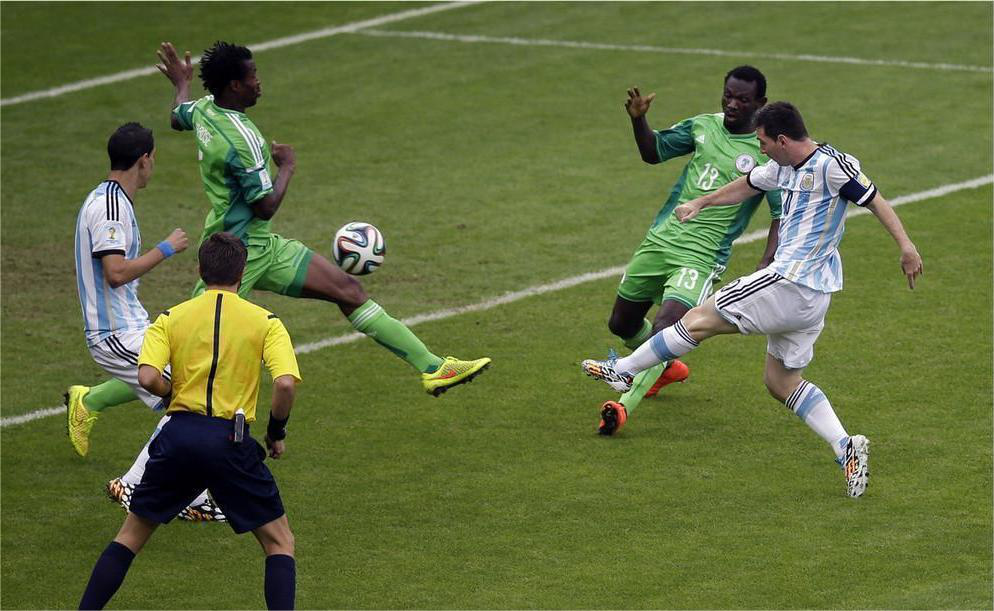

Detected a photo of a soccerplayer with confidence 0.363 at location [597.58, 40.96, 788.45, 268.87]
Detected a photo of a soccerplayer with confidence 0.288 at location [60.99, 73.77, 199.2, 294.7]
Detected a photo of a soccerplayer with confidence 0.33 at location [151.81, 23.33, 477.55, 249.82]
Detected a photo of a soccer with confidence 0.799 at location [334.73, 136.04, 386.1, 168.83]
Detected a photo of a soccerplayer with confidence 0.318 at location [583.72, 56.19, 918.33, 304.36]
Detected a photo of a soccerplayer with confidence 0.134 at location [101.66, 189.25, 262.34, 319.38]
Detected a photo of a soccerplayer with confidence 0.325 at location [68.79, 142.15, 315.1, 376.88]
Detected a photo of a soccer with confidence 0.118 at location [106.04, 292.99, 134.54, 313.78]
Detected a photo of a soccerplayer with confidence 0.117 at location [106.6, 294.17, 225.23, 322.15]


In [33]:
#### Your Task ####
#### Example use case 2 ####
img_path = '/root/lab1/lab5/data/my_data/test4.jpg'
texts = [["a photo of a soccerplayer", "a photo of a soccer"]]
run_Owlv2(img_path, texts)

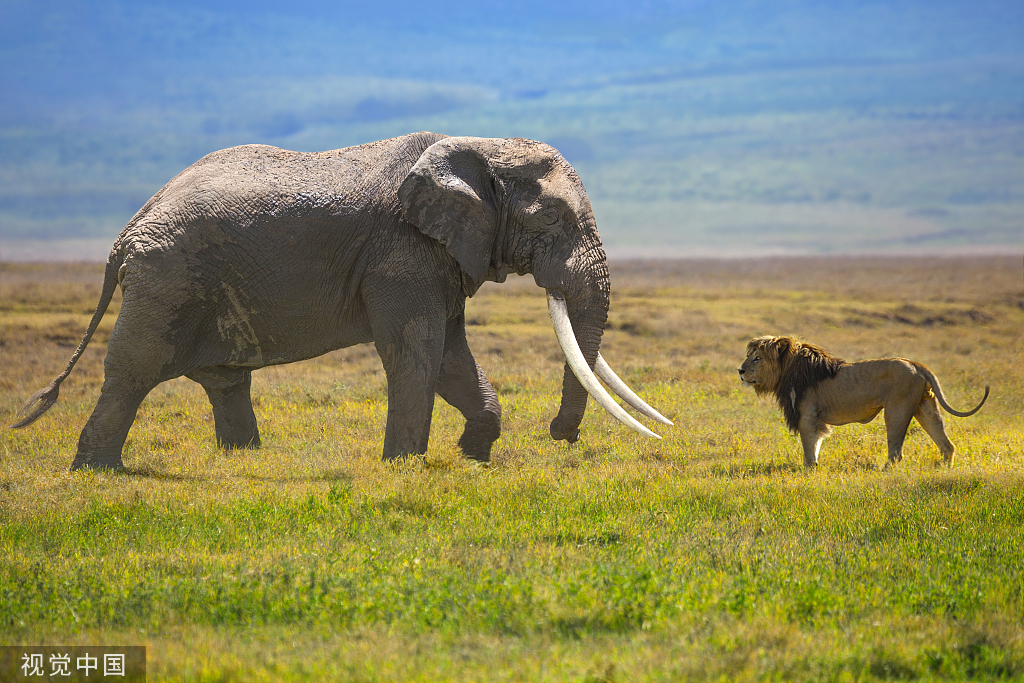

Detected a photo of a Elephant with confidence 0.887 at location [5.02, 86.8, 554.58, 315.61]
Detected a photo of a lion with confidence 0.55 at location [735.99, 222.2, 992.66, 313.15]


In [30]:
#### Your Task ####
#### Example use case 3 ####
img_path = '/root/lab1/lab5/data/my_data/test3.jpg'
texts = [["a photo of a Elephant", "a photo of a lion"]]
run_Owlv2(img_path, texts)